# Scientific Programming with Python
## Assignment: Shallow and Deep Learning Boiling Points
### SciPro_ID: 2024WS_93
### (mscho12s)
####
#### Karl N. Kirschner, 
#### Department of Computer Science, University of Applied Sciences Bonn-Rhein-Sieg, Sankt Augustin, Germany

#### Date: 18.01.2025
#####
#### Goal: Familiarize myself with shallow and deep machine learning while using scikit-learn[1] and PyTorch[2].
#####

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler

#### Task 1:
Using Pandas, load the JossM2019_boiling_dataset.csv dataset [3], remove rows with duplicated or missing data, and drop the column named "id".

In [2]:
dataset = pd.read_csv('JossM2019_boiling_dataset.csv', sep=';')

# cleaning dataset
dataset.drop_duplicates(inplace=True)
dataset.dropna(inplace=True)
dataset.drop(columns=["id"], inplace=True)

dataset

,name,molecular weight (g/mol),critical temperature (K),acentric factor,boiling point (K)
0,(+)-a-pinene,136.23704,647.00,0.3410,428.65
1,(+)-camphene,136.23704,638.00,0.2960,432.65
2,(-)-a-pinene,136.23704,647.00,0.3410,429.35
3,(-)-b-citronellol,156.26820,656.59,0.6120,498.65
4,(-)-camphene,136.23704,638.00,0.2960,439.95
...,...,...,...,...,...
6104,water,18.01528,647.13,0.3449,373.15
6105,xylenes,106.16740,620.21,0.3170,413.15
6106,zirconium bromide,410.84000,805.00,0.3100,633.15
6107,zirconium chloride,233.03480,778.00,0.2980,604.15


#### Task 2: Using scikit-learn

##### Task 2.1:
Normalize the data based on their maxiumum value.

In [3]:
scaler = MaxAbsScaler()

normalized_data = scaler.fit_transform(dataset.select_dtypes(include=["float64", "int64"]))
dataset_normalized = pd.DataFrame(normalized_data, columns=dataset.select_dtypes(include=["float64", "int64"]).columns)

##### Task 2.2:
Split the data into a training and a test dataset using a 75:25 ratio and a  random_state=1, focusing on the molecular weight and boiling point features.

In [4]:
features = ["molecular weight (g/mol)", "boiling point (K)"]
data = dataset_normalized[features]

train_data, test_data = train_test_split(data, test_size=0.25, random_state=1)

In [5]:
print(f"\nTrainingdata:")
for i, row in train_data.head().iterrows():
    print(f"Row {i}: molecular weight = {row['molecular weight (g/mol)']:.4f}, boiling point = {row['boiling point (K)']:.4f}")

print(f"\nTestdata:")
for i, row in test_data.head().iterrows():
    print(f"Row {i}: molecular weight = {row['molecular weight (g/mol)']:.4f}, boiling point = {row['boiling point (K)']:.4f}")


Trainingdata:
Row 1310: molecular weight = 0.3647, boiling point = 0.7319
Row 1228: molecular weight = 0.2016, boiling point = 0.5284
Row 579: molecular weight = 0.2476, boiling point = 0.5597
Row 19: molecular weight = 0.2789, boiling point = 0.6225
Row 800: molecular weight = 0.1727, boiling point = 0.5310

Testdata:
Row 4935: molecular weight = 0.2079, boiling point = 0.6225
Row 958: molecular weight = 0.1983, boiling point = 0.5384
Row 5368: molecular weight = 0.2731, boiling point = 0.5706
Row 234: molecular weight = 0.2354, boiling point = 0.5253
Row 4556: molecular weight = 0.2895, boiling point = 0.6637


##### Task 2.3:
Using the training dataset: create and train a linear regression model that uses the molecular weights to predict boiling points.

In [6]:
X_train = train_data[["molecular weight (g/mol)"]]
y_train = train_data["boiling point (K)"]

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
print(f"Model coefficient: {model.coef_[0]:.4f}")
print(f"Model intercept: {model.intercept_:.4f}")

Model coefficient: 0.7565
Model intercept: 0.3809


##### Task 2.4:
Using the test dataset: evaluate the performance by 
- creating an overlay plot containing a) the normalized target boiling point data and b) the model's predicted values, both as a function of the normalized molecular weights
- computing the Coefficient of Determination

In [8]:
X_test = test_data[["molecular weight (g/mol)"]]
y_test = test_data["boiling point (K)"]

y_predict = model.predict(X_test)

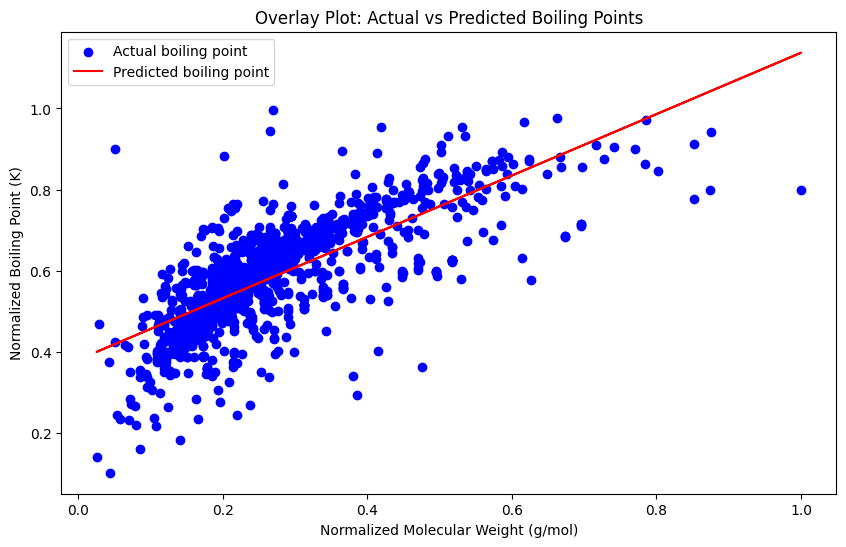

In [9]:
plt.figure(figsize=(10, 6))

plt.scatter(X_test, y_test, label="Actual boiling point", color="blue", marker='o')

plt.plot(X_test, y_predict, label="Predicted boiling point", color="red")

plt.xlabel("Normalized Molecular Weight (g/mol)")
plt.ylabel("Normalized Boiling Point (K)")
plt.title("Overlay Plot: Actual vs Predicted Boiling Points")
plt.legend()

plt.show()

In [10]:
r2 = r2_score(y_test, y_predict)
print(f"Coefficient of Determination (R²): {r2:.4f}")

Coefficient of Determination (R²): 0.5669


#### Task 3: Using PyTorch

##### Task 3.1: 
Split the normalized data from Task 2.1 into a training and a  test dataset, now using the molecular weight, acentric factor, critical temperature and boiling points features.

In [11]:
input_features = ["molecular weight (g/mol)", "acentric factor", "critical temperature (K)"]
target_feature = "boiling point (K)"

X_data = dataset_normalized[input_features]
y_target = dataset_normalized[target_feature]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.25, random_state=1)

##### Task 3.2:
Create and train a fully-connected neural network that has 1 input, 4 hidden and 1 output layers. This Network should implement
- a mean-squared-error loss function,
- a learning rate of 1.0e-3,
- PyTorch's Adam optimizer,
- be trained for 2000 epochs

In [12]:
# Convert training and testing datasets into PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [13]:
# Define the neural Network
class NeuralNetwork(nn.Module):
    """
    A fully connected neural network with:
    - 1 input layer (3 neurons for 3 features)
    - 4 hidden layers (each with 5 neurons)
    - 1 output layer (1 neuron for the output)
    
    Activation functions:
    - Tanh after the input layer and the last hidden layer
    - ReLU for the other hidden layers
    """
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        
        # Define the layers
        self.input_layer = nn.Linear(3, 5)
        self.hidden_layer1 = nn.Linear(5, 5)
        self.hidden_layer2 = nn.Linear(5, 5)
        self.hidden_layer3 = nn.Linear(5, 5)
        self.hidden_layer4 = nn.Linear(5, 5)
        self.output_layer = nn.Linear(5, 1)

    def forward(self, x):
        """
        Perform a forward pass through the network.
        
        Args:
            x (Tensor): Input data tensor.
        
        Returns:
            Tensor: Model prediction.
        """
        x = torch.tanh(self.input_layer(x))      # tanh activation after the input layer
        x = torch.relu(self.hidden_layer1(x))   # ReLU activation after first hidden layer
        x = torch.relu(self.hidden_layer2(x))   # ReLU activation after second hidden layer
        x = torch.relu(self.hidden_layer3(x))   # ReLU activation after third hidden layer
        x = torch.tanh(self.hidden_layer4(x))   # tanh activation after fourth hidden layer
        x = self.output_layer(x)                # Linear output
        return x


In [14]:
# Initialize the neural network model
model = NeuralNetwork()
loss_fn = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=1.0e-3)

In [15]:
# Training the model
epochs = 2000

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(X_train_tensor)
    
    loss = loss_fn(y_pred, y_train_tensor)
    loss.backward()
    
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [100/2000], Loss: 0.1427
Epoch [200/2000], Loss: 0.0145
Epoch [300/2000], Loss: 0.0141
Epoch [400/2000], Loss: 0.0136
Epoch [500/2000], Loss: 0.0132
Epoch [600/2000], Loss: 0.0125
Epoch [700/2000], Loss: 0.0119
Epoch [800/2000], Loss: 0.0112
Epoch [900/2000], Loss: 0.0102
Epoch [1000/2000], Loss: 0.0088
Epoch [1100/2000], Loss: 0.0066
Epoch [1200/2000], Loss: 0.0043
Epoch [1300/2000], Loss: 0.0029
Epoch [1400/2000], Loss: 0.0022
Epoch [1500/2000], Loss: 0.0017
Epoch [1600/2000], Loss: 0.0014
Epoch [1700/2000], Loss: 0.0011
Epoch [1800/2000], Loss: 0.0010
Epoch [1900/2000], Loss: 0.0008
Epoch [2000/2000], Loss: 0.0007


##### Task 3.3:
Using the test dataset, evaluate the model's performance using the Coefficient of Determination (R²)

In [16]:
with torch.no_grad():
    model.eval()
    y_test_pred = model(X_test_tensor)

    y_test_pred_numpy = y_test_pred.numpy()
    y_test_numpy = y_test_tensor.numpy()

    r2 = r2_score(y_test_numpy, y_test_pred_numpy)
    print(f"Coefficient of Determination (R²): {r2:.4f}")

Coefficient of Determination (R²): 0.9470


#### Task 4: Conclusion

###### Linear Regression Model (Task 2.3)
- Coefficient: 0.7565 -> As molecular weight increases, boiling point increases by 0.7565 units.
- Intercept: 0.3809 -> Represents the predicted boiling point when molecular weight is 0.

R² ≈ 0.57: This means the model explains around 57% of the variation in boiling points, suggesting that molecular weight is somewhat useful but not the only factor influencing boiling points.

---

##### Neural Network Performance (Task 3.2 & 3.3)
- Training Loss: Drops to near zero, indicating the model learns well without overfitting.

R² ≈ 0.95 on the test set: The model predicts the boiling points very precisely, with an R² score of around 0.95. This is excellent performance, meaning only ≈ 5% of the variances can not be explained by the model.

---

##### Conclusion
The linear regression model explains about 56.69% of the variance in boiling points, meaning molecular weight is a useful but not the only relevant factor. 

The neural network performs great with an R² of around 0.95. We can say for sure, that the combination of the molecular weight, the acentric factor and the critical temperature are the most relevant factors to predict the boilingpoint of the molecule. The remaining 5% are negligible.

#### References
1. scikit-learn, (https://scikit-learn.org/stable/) Online; accessed on January 18, 2025
2. PyTorch, (https://pytorch.org/) Online; accessed on January 18, 2025
3. Joss, L. and Müller, E.A., Machine Learning for Fluid Property Correlations: Classroom Examples with MATLAB, Journal of Chemical Education 2019 96 (4), 697-703, DOI: https://doi.org/10.1021/acs.jchemed.8b00692